# question 3

## **import libraries and datasets**

In [ ]:
#import libraries
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#download dataset
(images_train, label_train),(images_test,label_test) = mnist.load_data()

In [ ]:
#print shape of data
print(images_train.shape)
print(label_train.shape)
print(images_test.shape)
print(label_test.shape)

# Plot 5 random data of our dataset

In [ ]:
#show mnist dataset
import random
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))

rand_list=[]
for i in range(5):
    rand_list.append(random.randint(0,60000))
print(rand_list)

j=0
for i in rand_list:
  plt.subplot(5,5,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(images_train[i])
  j=j+1
plt.show()

# Normalization

In [ ]:
#data normalization
train_images = images_train.astype('float32')/255
test_images = images_test.astype('float32')/255


In [ ]:
#Convert images to vectors
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))
#shape of data
print(train_images.shape)
print(test_images.shape)

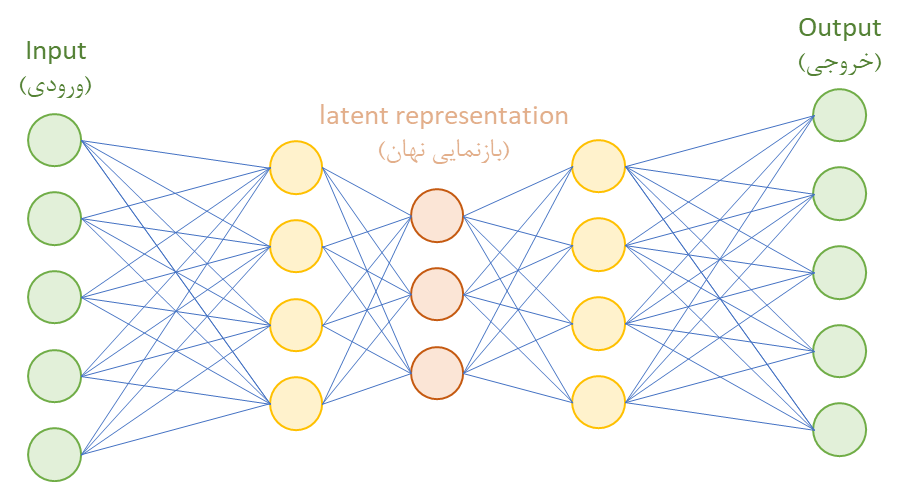

# Designing Auto-encoder model

In [ ]:
#auto_encoder
input_size = 784      #input size
hidden_size1 = 500    #Number of neurons in the first layer
hidden_size2 = 300    #Number of neurons in the second layer
hidden_size3 = 100    #Number of neurons in the third layer
latent_size = 30      #latent size

#encoder and decoder
input_img = Input(shape = (input_size,))
hidden_layer_1 = Dense(hidden_size1, activation = "relu")(input_img)
hidden_layer_2 = Dense(hidden_size2, activation = "relu")(hidden_layer_1)
hidden_layer_3 = Dense(hidden_size3, activation = "relu")(hidden_layer_2)
#latent space
latent_layer = Dense(latent_size, activation = "sigmoid")(hidden_layer_3)
hidden_layer_4 = Dense(hidden_size3, activation = "sigmoid")(latent_layer)
hidden_layer_5 = Dense(hidden_size2, activation = "sigmoid")(hidden_layer_4)
hidden_layer_6 = Dense(hidden_size1, activation = "sigmoid")(hidden_layer_5)
output_layer = Dense(input_size, activation = "sigmoid")(hidden_layer_6)

#autoencoder model
autoencoder = Model(input_img, output_layer)
autoencoder.summary()



In [ ]:
#encoder model
encoder = Model(input_img, latent_layer)
encoder.summary()

# training the model

In [ ]:
#compile the model
#fit the model with adam optimizer and binary cross entropy
autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy")

In [ ]:
#fit the model with 100 epochs
autoencoder.fit(train_images, train_images, epochs =100, shuffle = True, validation_data = (test_images, test_images))

# Evaluate the Auto-encoder

In [ ]:
#predict test data with model
encoded_img = autoencoder.predict(test_images)

In [ ]:
#Display actual test images and images made with model
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original data
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# classification

In [ ]:
#classification model
latent_1 = Input(shape = (latent_size,))
layer_1 = Dense(30,activation="sigmoid")(latent_1)
layer_2 = Dense(30,activation="sigmoid")(layer_1)
layer_3 = Dense(10,activation="softmax")(layer_2)

#define classifier model
classifier = Model(latent_1, layer_3)
classifier.summary()

In [ ]:
#encoder output
encoded_train = encoder.predict(train_images)
encoded_test = encoder.predict(test_images)

In [ ]:
#Convert output label to categorical form
train_label = keras.utils.to_categorical(label_train, 10)
test_label = keras.utils.to_categorical(label_test, 10)

In [ ]:
#compile and fit classifier
#fit the model with adam optimizer and categorical cross entropy
classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = classifier.fit(encoded_train,train_label,epochs = 100,validation_data =(encoded_test,test_label))

# plot loss of model

In [ ]:
#show data validation and data train loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()